# TABLE OF CONTENTS

* [1. INTRODUCTION](#section-one)
* [2. SETUP](#section-two)
    - [2.1 Install Yahoo Finance Package](#subsection-two-one)
    - [2.2 Import/Wrangle Data](#subsection-two-two)
    - [2.3 Inspect Data](#subsection-two-three)
* [3. SEARCHING RESPECTIVELY FOR THE PORTFOLIO WITH THE LOWEST VOLATILITY AND THE HIGHEST SHARPE](#section-three)
    - [3.1 Question 1: How do we simulate N sets of weights for the chosen securities?](#subsection-three-one)
    - [3.2 Question 2: How do we calculate the portfolio returns and volatilities?](#subsection-three-two)
    - [3.3 Question 3: How do we identify the highest Sharpe ratio portfolio and the minimum volatility portfolio?](#subsection-three-three)

* [4. CONCLUSION](#section-four)
* [5. REFERENCES](#section-five)

<a id="section-one"></a>
# 1. INTRODUCTION

## Team members
### Lucas Sebastian A0112080B
### Sekson Ounsaengchan (Beer) A0227885M
### Zhao Mengyu (Jessica) A0227914B

## Objective

- Calculate optimal portfolio weights using Monte Carlo simulations
- Plot the simulated efficient frontier 

## Motivation

How much should you invest in a security? Should you invest more in a security with higher returns or with lower volatility? Should you really just look at a security in isolation? From the perspective of a portfolio, while the portfolio return is the weighted-average of individual securities, the portfolio risk is not. A security's contribution to the portfolio risk comes from both its volatility and its correlation with other securities in the portfolio. As the number of securities in the portfolio increases (assuming that the securities' returns are not perfectly correlated), the contribution from the latter overwhelms that of the former. 

How do you to construct a portfolio with the lowest portfolio risk and the highest Sharpe ratio respectively? The key is in finding the optimal portfolio weights. In this notebook, we stimulate N sets of weights for a set of chosen securities. Then, we back out two set of weights for the portfolios with the lowest portfolio risk and the highest Sharpe ratio, respectively.


## Key Steps

1. Simulate N sets of weights for the chosen securities
2. Calculate the portfolio return, standard deviation, and Sharpe ratio for the N portfolios
3. Identify the portfolio that has the highest Sharpe ratio and the lowest volatility, respectively

<a id="section-two"></a>
# 2. SETUP

<a id="subsection-two-one"></a>
## 2.1 Install Yahoo Finance API

In [1]:
# Anaconda Prompt > "$ pip install yfinance --upgrade --no-cache-dir"
# https://pypi.org/project/fix-yahoo-finance/

<a id="subsection-two-two"></a>
## 2.2 Import/Wrangle Data

In [1]:
import pandas as pd  
import numpy as np
import datetime as dt 
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# visual styles
plt.style.use('fivethirtyeight')
np.random.seed(1)

See Other Visual Styles [HERE](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html)

In [4]:
symbols_list = ["AAPL", "AMZN", "FB", "WMT"]
start = dt.datetime(2010,8,1)
end = dt.datetime(2020,7,31)
data = yf.download(symbols_list, start=start, end=end)
yf.Ticker("AAPL").info

[*********************100%***********************]  4 of 4 completed


{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

<a id="subsection-two-three"></a>
## 2.3 Inspect Data

In [4]:
data.head()

Adj Close                                Close                  \
                AAPL        AMZN  FB        WMT      AAPL        AMZN  FB   
Date                                                                        
2010-08-02  8.007693  120.070000 NaN  39.279251  9.351786  120.070000 NaN   
2010-08-03  8.010142  122.419998 NaN  39.187572  9.354643  122.419998 NaN   
2010-08-04  8.042251  127.580002 NaN  39.424416  9.392143  127.580002 NaN   
2010-08-05  8.003103  127.830002 NaN  39.439693  9.346429  127.830002 NaN   
2010-08-06  7.953872  128.320007 NaN  39.569584  9.288929  128.320007 NaN   

                           High              ... Low                 Open  \
                  WMT      AAPL        AMZN  ...  FB        WMT      AAPL   
Date                                         ...                            
2010-08-02  51.410000  9.378214  120.379997  ... NaN  50.950001  9.301429   
2010-08-03  51.290001  9.402143  122.870003  ... NaN  51.029999  9.321786   
2010-08-04  51.599998  9.438571  128.470001  ... NaN  51.009998  9.387143   
2010-08-05  51.619999  9.399286  128.000000  ... NaN  51.220001  9.347500   
2010-08-06  51.790001  9.338929  128.399994  ... NaN  51.110001  9.277857   

                                          Volume                         
                  AMZN  FB        WMT       AAPL     AMZN  FB       WMT  
Date                                                                     
2010-08-02  119.150002 NaN  51.549999  428055600  5443700 NaN  13861000  
2010-08-03  120.000000 NaN  51.250000  417653600  5953800 NaN  10668600  
2010-08-04  123.059998 NaN  51.040001  420375200  9270800 NaN   8068900  
2010-08-05  126.769997 NaN  51.639999  289097200  4282300 NaN   7439000  
2010-08-06  126.720001 NaN  51.419998  444897600  5065200 NaN   8270300  

[5 rows x 24 columns]

Let's focus on the variable adjusted close

In [5]:
maindata = data["Adj Close"]
maindata.head()

,AAPL,AMZN,FB,WMT
Date,,,,
2010-08-02,8.007693,120.070000,NaN,39.279251
2010-08-03,8.010142,122.419998,NaN,39.187572
2010-08-04,8.042251,127.580002,NaN,39.424416
2010-08-05,8.003103,127.830002,NaN,39.439693
2010-08-06,7.953872,128.320007,NaN,39.569584


In [6]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-08-02 to 2020-07-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2517 non-null   float64
 1   AMZN    2517 non-null   float64
 2   FB      2063 non-null   float64
 3   WMT     2517 non-null   float64
dtypes: float64(4)
memory usage: 98.3 KB


Let's visualize the past price trends of the chosen securities.

Text(0, 0.5, 'price in $')

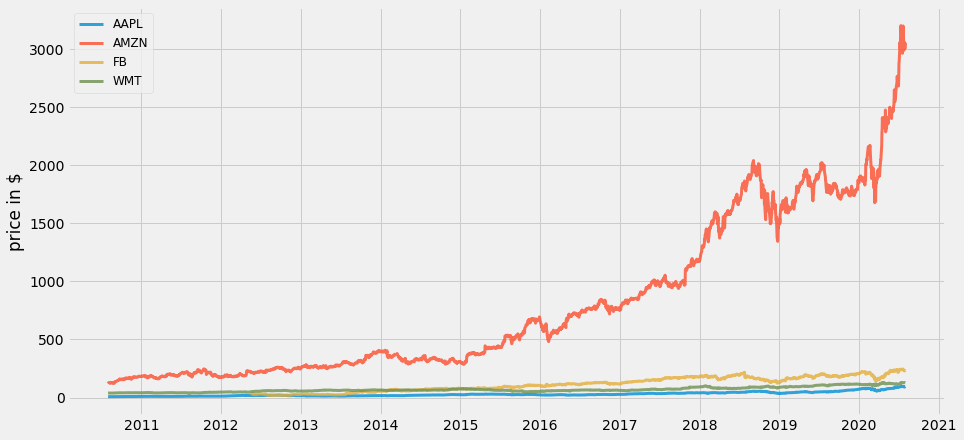

In [7]:
plt.figure(figsize=(14, 7))
for c in maindata.columns.values:
    plt.plot(maindata.index, maindata[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Amazon is experiencing a strong run-up, especially during the COVID19 pandemic.

** What may explain Amazon's run-up during the COVID19 pandemic?

In [8]:
maindata.head()

,AAPL,AMZN,FB,WMT
Date,,,,
2010-08-02,8.007693,120.070000,NaN,39.279251
2010-08-03,8.010142,122.419998,NaN,39.187572
2010-08-04,8.042251,127.580002,NaN,39.424416
2010-08-05,8.003103,127.830002,NaN,39.439693
2010-08-06,7.953872,128.320007,NaN,39.569584


** What is going on with Facebook? It went public later on May 18, 2012.

Text(0, 0.5, 'daily returns')

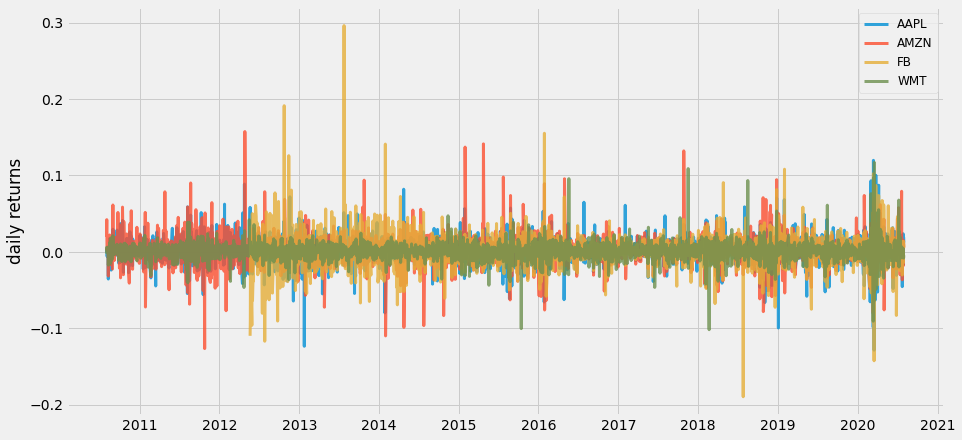

In [9]:
returns = maindata.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

WMT seems to be the least volatile. Its technology counterparts seem more volatile, especially Facebook. Facebook has a few drastic spikes during the sample period.

In [10]:
returns

,AAPL,AMZN,FB,WMT
Date,,,,
2010-08-02,NaN,NaN,NaN,NaN
2010-08-03,0.000306,0.019572,NaN,-0.002334
2010-08-04,0.004008,0.042150,NaN,0.006044
2010-08-05,-0.004868,0.001960,NaN,0.000388
2010-08-06,-0.006151,0.003833,NaN,0.003293
...,...,...,...,...
2020-07-24,-0.002477,0.007487,-0.008126,-0.003039
2020-07-27,0.023700,0.015388,0.012093,-0.000228
2020-07-28,-0.016427,-0.017963,-0.014475,0.004192


** Why is return for the first observation NaN?  

<a id="section-three"></a>
# 3. SEARCHING RESPECTIVELY FOR THE PORTFOLIO WITH THE LOWEST VOLATILITY AND THE HIGHEST SHARPE

<a id="subsection-three-one"></a>
## 3.1 Question 1: How do we simulate N sets of weights for the chosen securities?

How should allocate our budget to each of securities in our portfolio. If our total budget is 1, the sum of the weights for the securities will be 1, such that the weights correspond to the portion of budget we allocate to a specific security. 

"random_portfolios" function will generate portfolios with random weights assigned to each stock. You can decide how many random portfolios you want to generate by passing num_portfolios argument. The num_securities argument indicates the number of securities in the portfolio (i.e., the number of elements in our stock list). This function generates and returns the random portfolio weights for all securities. It also returns a portfolio's annualised returns, annualised volatility, and Sharpe ratio (these parameters come from function portfolio_annualised_performance, which is discussed in the next section).

In [11]:
def random_portfolios(num_portfolios, num_securities, mean_returns, cov_matrix, risk_free_rate):
    """
    Function returns a tuple containing 2 arrays. The results array is a 2D array, columns for the portfolio instnace, rows for the 
    std dev, return, and sharpe ratio respectively. weights record is an array of arrays which contain the weight of each underlying. 
    Each row is for each portfolio, each column for each underlying
    
    Parameters:
        num_portfolios (int): The number of portfolio instances to create 
        num_securities (int): the number of securities used  
        mean_returns (pandas.Series): mean return of each security. len(mean_returns) must match num_securities 
        cov_matrix (pandas.DataFrame): Covariance matrix of shape n * n, where n is num_securities 
        risk_free_rate (numpy.float): the risk free rate used in computation for Sharpe Ratio
    Returns:
        tuple: first element contains 2D array columns for the portfolio instnace, rows for the 
                std dev, return, and sharpe ratio respectively. 
                second element contains weights record, an list of arrays which contain the weight of each underlying.
    
    """
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        
        # Return random floats in the half-open interval [0.0, 1.0) 
        weights = np.random.random(num_securities)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

<a id="subsection-three-two"></a>
## 3.2 Question 2: How do we calculate the portfolio returns and volatilities?

"portfolio_annual_performance" function takes in three arguments: the weight for each security, average returns for each security, and covariance matrix of all securities in the portfolio. The function will then calculate the annualized portfolio returns and volatilities. Annualization assumes 252 trading days in one year.

In [12]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    """
    Function returns the annualized performance given the weights of the portfolio. 
    Function assumes current means and cov are daily returns 
    
    Parameters:
        weights (numpy.array): array containing relative weights. 
        mean_returns (pandas.Series): mean return of each security. len(mean_returns) must match num_securities 
        cov_matrix (pandas.DataFrame): Covariance matrix of shape n * n, where n is num_securities 
    Returns:
        tuple: Tuple contains the standard deviation and returns of the portfolio, annualized. 
    """
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

Details on the calculation of portfolio standard deviation [HERE](https://stackoverflow.com/questions/59462628/is-there-a-way-to-vectorize-the-portfolio-standard-deviation-in-python-pandas)  
Details on dot product [HERE](https://towardsdatascience.com/linear-algebra-basics-dot-product-and-matrix-multiplication-2a7624942810).  


In [98]:
num_securities = len(symbols_list)
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 300000 # Simulate 30000 sets of weights
risk_free_rate = 0.02 # The 10-year treasury rate 

<a id="subsection-three-three"></a>
## 3.3 Question 3: How do we identify the highest Sharpe ratio portfolio and the minimum volatility portfolio?

What does this function do? First, it generates random portfolio from function random_portfolios, which returns the results (portfolio returns, portfolio volatility, portfolio Sharpe ratio) and weights for the corresponding result. Then it locates the portfolio with the highest Sharpe ratio portfolio and displays the highest Sharpe ratio portfolio as a red star sign. It repeats the process for the lowest volatility portfolio and displays it as a green star on the plot. Finally, it also plots all the randomly generated portfolios with colour map applied to them based on the Sharpe ratio. The bluer, the higher Sharpe ratio.

The function also displays the portfolio weights for the chosen securities.

In [89]:
def display_simulated_ef_with_random(df, mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,num_securities, mean_returns, cov_matrix, risk_free_rate)
    """
    Function displays the efficient frontier, and the weights allocated for the minimum variance portfolio 
    and market optimal portfolio using the Monte Carlo method. 
    
    Parameters 
        df (pandas.DataFrame): Dataframe containing the daily returns 
        mean_returns (pandas.Series): Mean return of each security. len(mean_returns) must match num_securities 
        cov_matrix (pandas.DataFrame): Covariance matrix of shape n * n, where n is num_securities 
        num_portfolios (int): The number of portfolio instances to create 
        risk_free_rate (numpy.float):Tthe risk free rate used in computation for Sharpe Ratio
    
    """
    # Identify the Maximum Sharpe portfolio
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df.columns,columns=['allocation'])
    max_sharpe_allocation['allocation'] = [round(i*100,2)for i in max_sharpe_allocation['allocation']]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    # Identify the Minimum Variance Portfolio 
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df.columns,columns=['allocation'])
    min_vol_allocation['allocation'] = [round(i*100,2)for i in min_vol_allocation['allocation']]
    min_vol_allocation = min_vol_allocation.T
    
    # Output the portfolio return and standard deviation of the Minimum Volatility Portfolio
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("Sharpe Ratio:", round(results[2,min_vol_idx],2))
    print ("\n")
    print (min_vol_allocation)
    
    # Output the portfolio return and standard deviation of the Maximum Sharpe Portfolio
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("Sharpe Ratio:", round(results[2,max_sharpe_idx],2))
    print ("\n")
    print (max_sharpe_allocation)
    
    # Plot anualized portfolio return vs annualized portfolio volatility
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    
    # Mark Maximum Sharpe portfolio
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    
    # Mark Minimum variance portfolio
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.2
Annualised Volatility: 0.17
Sharpe Ratio: 1.03


             AAPL  AMZN    FB    WMT
allocation  16.65  9.31  7.88  66.16
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.29
Annualised Volatility: 0.21
Sharpe Ratio: 1.28


             AAPL   AMZN    FB    WMT
allocation  30.15  40.72  7.84  21.28


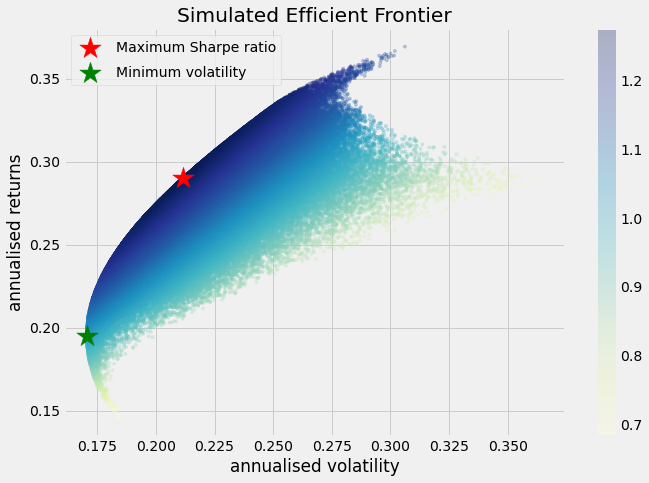

In [99]:
display_simulated_ef_with_random(returns, mean_returns, cov_matrix, num_portfolios, risk_free_rate)

The lowest risk portfolio allocates 65% of the funds to Walmart (WMT). This is not surprising as Walmart is not only the least volatile stock among the chosen securities, its returns correlate the least with its technology counterparts (i.e., Apple, Amazon, and Facebook). 

What if you want to take more risk, you can go for the best risk-adjusted return (i.e., the portfolio with the highest Sharpe ratio). In this case, you will allocate the most to Amazon (AMZN), 40% of the portfolio. Now, Walmart has only 23% allocation. 

<a id="subsection-three-four"></a>
## 3.4 Optional Question 2: Apply Markowitz portfolio optimization to the same set of securities in the Bootcamp. Compare and contrast the Sharpe ratio of your simulated maximum Sharpe portfolio and minimum volatility portfolio (versus the optimal weights calculated with Markowitz portfolio optimization)? What happen to the simulated weights as you increase the number of simulations?

In [91]:
# Execute pip install PyPortfolioOpt in terminal first!
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(maindata)
S = CovarianceShrinkage(maindata).ledoit_wolf()

# max sharpe ratio
ef_max_sharpe = EfficientFrontier(mu, S)
ef_max_sharpe.max_sharpe()

# min volatility
ef_min_vol = EfficientFrontier(mu, S)
ef_min_vol.min_volatility()
print("Minimum Volatility Portfolio Performance")
print()
print(ef_min_vol.portfolio_performance(verbose=True))
print()
print("Asset Allocation")
print(pd.Series(ef_min_vol.clean_weights()))
print ("-"*80)
print("Maximum Sharpe Ratio Portfolio Performance")
print()
print(ef_max_sharpe.portfolio_performance(verbose=True))
print()
print("Asset Allocation")
print(pd.Series(ef_max_sharpe.clean_weights()))
print ("-"*80)

Minimum Volatility Portfolio Performance

Expected annual return: 18.8%
Annual volatility: 16.8%
Sharpe Ratio: 1.00
(0.18801021431154913, 0.16843430417318694, 0.9974821645524077)

Asset Allocation
AAPL    0.15499
AMZN    0.09153
FB      0.12433
WMT     0.62914
dtype: float64
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Performance

Expected annual return: 30.0%
Annual volatility: 21.7%
Sharpe Ratio: 1.29
(0.29971651650458336, 0.21733104056709396, 1.2870527641827119)

Asset Allocation
AAPL    0.29913
AMZN    0.45401
FB      0.08913
WMT     0.15774
dtype: float64
--------------------------------------------------------------------------------


### Answer

According to our observation:
1. Annualized return, volatility, and allocation of securities of portfolio are not constant even when we rerun using the same configurations. This is because Monte-Carlo simulation is based on repeated random sampling of securities' weight of portfolio.
2. Using Markowitz portfolio optimization, we always get the same result because we use the default settings of the Markowitz optimization method (via the PyPortfolioOpt package) which will always have one set of optimal weights for the chosen stocks.
3. By increasing the number of simulations in Monte-Carlo method from 30000 to 300000 (10x more!), we always get the same results. This is influenced by law of large numbers that the average number will converge towards the true mean.  
4. To compare the The results from Monte Carlo and those from Markowitz, we changed risk-free rate used in the Monte Carlo simulation from 0.65% to 2%, the same rate used in Markowitz functions. The results of both methods are very close. The more number of simulations in Monte Carlo, the more results converge towards Markowiz's outcomes.

<a id="section-five"></a>
# 4. CONCLUSION

## Efficient Frontier

The plot of the randomly simulated portfolio shows you an arch on the top of clustered blue dots. This line is called efficient frontier. Why is it efficient? The line gives you the lowest risk for a given target return or the highest return for a given level of risk. All the other dots right to the line are inefficient (i.e., higher risk for a given target return). What about the part of the arch that curves down? That is the inefficient frontier, you can always choose a portfolio with a better return for a given level of risk!

<a id="section-five"></a>
# 5. REFERENCES

Markowitz, H.M. (March 1952). "[Portfolio Selection](http://onlinelibrary.wiley.com/doi/10.1111/j.1540-6261.1952.tb01525.x/full)". The Journal of Finance. 7 (1): 77–91. 

This notebook is adapted from code written by [Ricky Kim](https://towardsdatascience.com/@rickykim78) and [Bernard Brenyah](https://medium.com/@bbrenyah). 